# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-18 10:00:03.964224


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/17/20


,10/17/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8106384,219286,2.71
Brazil,5224362,153675,2.94
India,7494551,114031,1.52
Mexico,847108,86059,10.16
United Kingdom,708298,43669,6.17
Italy,402536,36474,9.06
Spain,936560,33775,3.61


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/17/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
46977,US,7979709,2020-10-15,217692.0,820.0,63610.0,53405.142857
46976,US,7916099,2020-10-14,216872.0,985.0,59494.0,52345.285714
46975,US,7856605,2020-10-13,215887.0,802.0,52406.0,51037.714286
46974,US,7804199,2020-10-12,215085.0,317.0,41653.0,49542.428571
46973,US,7762546,2020-10-11,214768.0,398.0,44614.0,49243.000000
46972,US,7717932,2020-10-10,214370.0,618.0,54639.0,47941.571429
46971,US,7663293,2020-10-09,213752.0,990.0,57420.0,47285.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/17/20


,10/17/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,482891,33347.0,6.91
Texas,848442,17440.0,2.06
California,873614,16956.0,1.94
New Jersey,218738,16204.0,7.41
Florida,752481,15917.0,2.12
Massachusetts,142930,9723.0,6.80
Illinois,343386,9452.0,2.75


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/17/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1617,California,868148,2020-10-15,16832.0,103.0,2944.0,3268.285714
1616,California,865204,2020-10-14,16729.0,85.0,3894.0,3325.142857
1615,California,861310,2020-10-13,16644.0,58.0,3397.0,3301.142857
1614,California,857913,2020-10-12,16586.0,7.0,2723.0,3200.857143
1613,California,855190,2020-10-11,16579.0,12.0,2780.0,3211.000000
1612,California,852410,2020-10-10,16567.0,81.0,3334.0,3269.857143
1611,California,849076,2020-10-09,16486.0,68.0,3806.0,3294.714286


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/17/20


,10/17/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,288136,6863.0,2.38
Orange,56672,1409.0,2.49
Riverside,63284,1269.0,2.01
San Bernardino,59602,998.0,1.67
San Diego,51982,869.0,1.67
San Joaquin,21187,484.0,2.28
Sacramento,24192,468.0,1.93


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/17/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5127,Los Angeles,286183,2020-10-15,6834.0,22.0,1167.0,1074.000000
5126,Los Angeles,285016,2020-10-14,6812.0,22.0,1266.0,1081.571429
5125,Los Angeles,283750,2020-10-13,6790.0,17.0,768.0,1127.714286
5124,Los Angeles,282982,2020-10-12,6773.0,2.0,847.0,1148.571429
5123,Los Angeles,282135,2020-10-11,6771.0,3.0,970.0,1081.428571
5122,Los Angeles,281165,2020-10-10,6768.0,27.0,1256.0,1075.285714
5121,Los Angeles,279909,2020-10-09,6741.0,15.0,1244.0,1036.571429
5120,Los Angeles,278665,2020-10-08,6726.0,17.0,1220.0,1042.000000
5119,Los Angeles,277445,2020-10-07,6709.0,28.0,1589.0,1020.857143
5118,Los Angeles,275856,2020-10-06,6681.0,27.0,914.0,938.857143



7 day new US cases as of 10/17/20


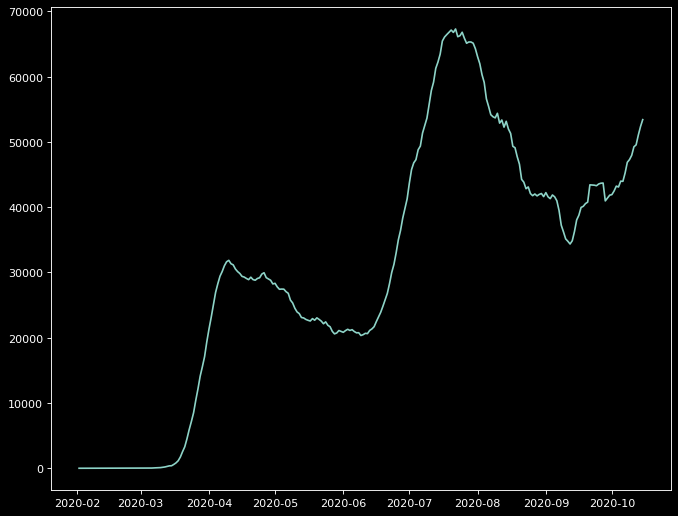

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/17/20


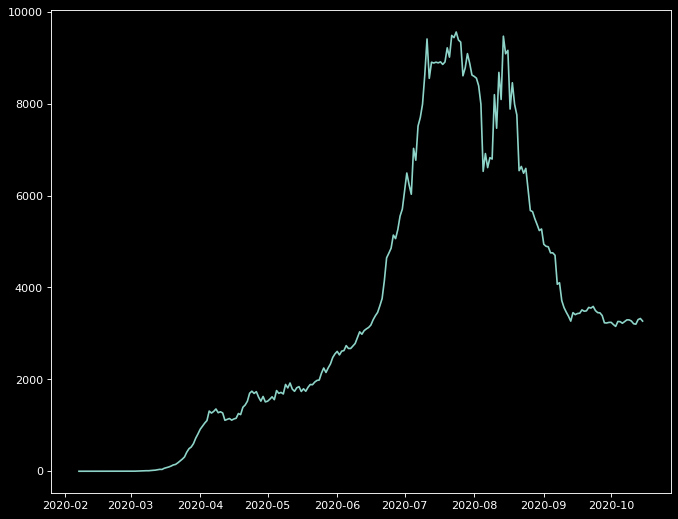

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/17/20


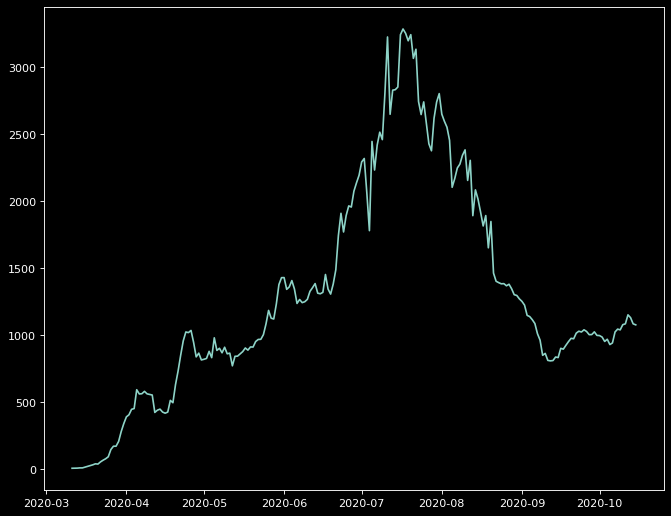

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()